In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
# loading data

data=pd.read_csv(r"../data/ACME-HappinessSurvey2020.csv")



In [251]:
X=data.drop(['Y','X2','X4'],axis=1)
X.shape
Y=data['Y']
Y.shape

(126,)

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [253]:
#Splitting data for training and testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, test_size=0.15)

In [254]:
KNN2=KNeighborsClassifier()

KNN2_param_grid={'n_neighbors':[2,5,7,9,11,13],'weights':['uniform','distance']}
GS_KNN=GridSearchCV(KNN2,param_grid=KNN2_param_grid, cv=3)

GS_KNN.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [255]:
print(GS_KNN.best_params_)

GS_KNN_y_pred=GS_KNN.predict(X_test)

{'n_neighbors': 9, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.67      0.89      0.76         9

    accuracy                           0.74        19
   macro avg       0.76      0.74      0.73        19
weighted avg       0.77      0.74      0.73        19



<Axes: >

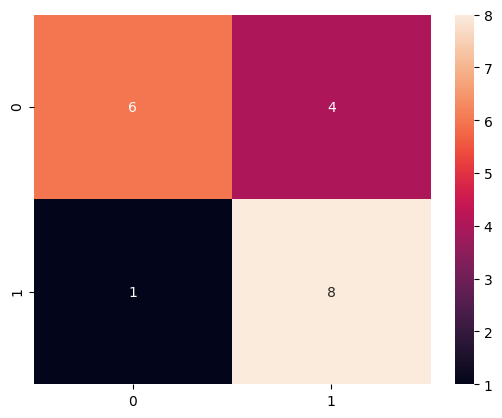

In [256]:
print(classification_report(Y_test,GS_KNN_y_pred))

CM3=confusion_matrix(Y_test,GS_KNN_y_pred)
sns.heatmap(CM3,annot=True)

In [257]:
import pickle

# Save to file
with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(GS_KNN, file)
